## Install all the libraries compatabile with each other before Pre-Training/Finetuning and testing
## Note: Pre-training, Finetuning and inference are done on TPU. However Inference can be performed on CPU as well.

In [2]:
!pip install tensorflow==2.12.0
!pip install -q tensorflow-addons==0.19.0
!pip install -q tensorflow-probability==0.19.0
!pip install -q tensorflow-io==0.32.0
!pip install -q opencv-python-headless
!pip install -q librosa
!pip install -q scikit-learn
!pip install -qU tensorflow_extra --no-deps
!pip install vit_keras

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=65543c602d0551a86407ed064abb03cc2b4385ff0f29ba60ca33a222cd6be3b0


## Import all the Libraries including the custom libraries
## Config.py contains all the configurations required to train the models
## Utility.py contains the common functions used by all teammates for pre-processing and data pipeline
## VGG16_RCNN.py contains functions specific to pretrain, finetune, and infer the VGG_RCNN model

In [3]:
import sys
sys.path.append('/kaggle/input/birdclef-config')
sys.path.append('/kaggle/input/birdclef-util')
sys.path.append('/kaggle/input/vgg-rcnn')
print(sys.path)
from Config import config as CFG
import UtilityFunctions
import VGG16_RCNN

import warnings
warnings.filterwarnings('ignore')
myModel = VGG16_RCNN.VGG16_RCNN()
myModel.initaiteModel()
utility_obj = UtilityFunctions.Utility()
utility_obj.initiate_util()

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from vit_keras import vit
import numpy as np
import efficientnet.tfkeras as efn
import tensorflow_extra as tfe
from tensorflow.keras.applications import EfficientNetB1
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow.keras.layers import Input,GlobalAveragePooling2D
from tensorflow.keras.layers import MultiHeadAttention,  Dropout,Add
from tensorflow.keras.layers import Input, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LayerNormalization
import tensorflow.keras.backend as K
cmap = mpl.colormaps['coolwarm'] 


['/kaggle/working', '/kaggle/lib/kagglegym', '/kaggle/lib', '/kaggle/input/birdclef-2021', '/kaggle/input/birdclef-2022', '/kaggle/input/birdclef-2023', '/usr/local/lib/python38.zip', '/usr/local/lib/python3.8', '/usr/local/lib/python3.8/lib-dynload', '', '/root/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/site-packages', '/kaggle/input/birdclef-config', '/kaggle/input/birdclef-util', '/kaggle/input/vgg-rcnn']


D0523 00:06:55.106940101      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0523 00:06:55.106971475      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0523 00:06:55.106975398      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0523 00:06:55.106978167      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0523 00:06:55.106980601      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0523 00:06:55.106983302      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0523 00:06:55.106985762      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0523 00:06:55.

np: 1.23.5
pd: 2.0.0
sklearn: 1.2.2
librosa: 0.10.0.post2
tf: 2.12.0
tfp: 0.19.0
tfa: 0.19.0
tfio: 0.32.0
VGG16_RCNN
Utility Function


## Initialize the variables before modeling and testing.
If CFG.debug and debug are set to True,only one epoch is executed with 64(using CPU) or 512(using TPU) samples for pretraining and finetuning
Set inference=True for only testing the model

In [4]:
epochs=1
dropout_rate=0.2
mlp_activation=tf.nn.gelu
num_heads=8
CFG.debug=False
inference=True
test_sample_size = 64
debug=False
load_model_path = '/kaggle/input//kaggle/input/birdclef-vgg16-rcnn-pretrained.h5'

# Pre- Training
The below code will perform the pretraining of the model
The /kaggle/input/birdclef-vgg16-rcnn-pretrained/birdclef_VGG16_RCNN_pretrained.h5 is trained weights for the model.
Uncomment and run this code if you need to pre-train the model again. Pretraining is done on TPU VM v3-8 Only. Use debug=True if you want to check for one epoch

> Running on TPU-VM  | Num of TPUs:  8
<class 'Config.config'>
58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 mel_spectrogram (MelSpectro  (None, 128, None, 3)     0         
 gram)                                                           
                                                                 
 z_score_min_max (ZScoreMinM  (None, 128, None, 3)     0         
 ax)                                                             
                                                                 
 time_freq_mask (TimeFreqMas  (None, 128, None, 3)     0         
 k)                                                              
                                                                 

2023-05-22 21:17:20.035688: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_76/ReadVariableOp.
2023-05-22 21:17:20.186125: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_76/ReadVariableOp.
2023-05-22 21:21:25.440930: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
2023-05-22 21:21:25.495325: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.



Epoch 1: val_auc improved from -inf to 0.00284, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 2: val_auc improved from 0.00284 to 0.02997, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 3: val_auc improved from 0.02997 to 0.10228, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 4: val_auc improved from 0.10228 to 0.21404, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 5: val_auc improved from 0.21404 to 0.33279, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 6: val_auc improved from 0.33279 to 0.38347, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 7: val_auc improved from 0.38347 to 0.45517, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 8: val_auc improved from 0.45517 to 0.48763, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 9: val_auc improved from 0.48763 to 0.52636, saving model to birdclef_VGG16_RCNN_pretrained.h5

Epoch 10: val_auc improved from 0.52636 to 0.59593, saving model to birdclef_VGG16_R

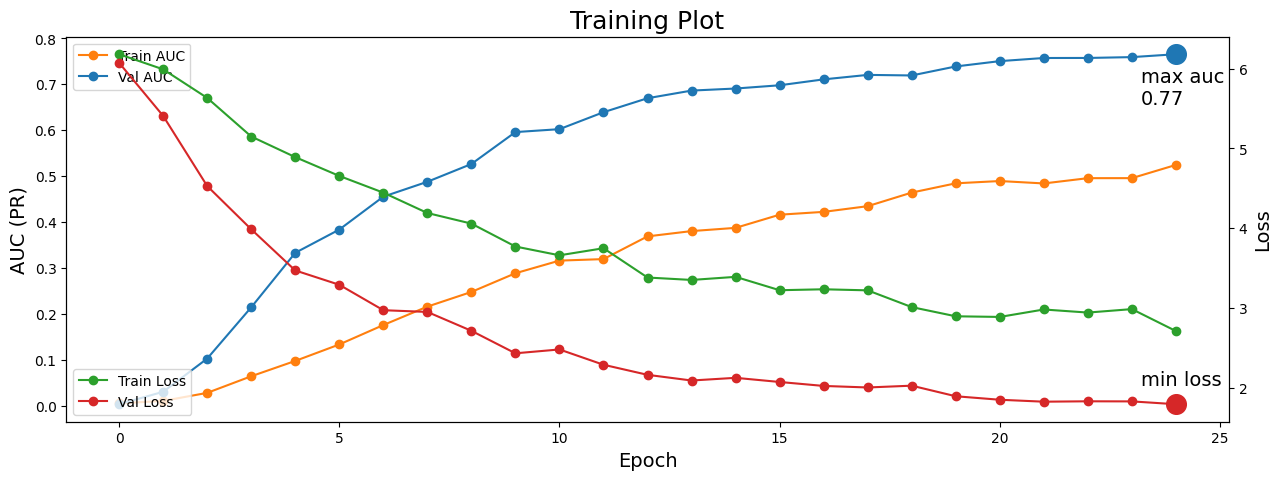

In [4]:
#uncomment and run this code if you need to pre-train the model again
#The actual pretrianing was done on a sepreate file, this is just to show the graph, and the code working.
#mode_of_training='pretraining'
#myModel.vgg_main(CFG,utility_obj,mode_of_training,load_model_path,test_sample_size,debug=False, epochs = 5)

# Fine-Tuning
Uncomment and run this code if you need to finetune the model again on birdclef 2023. FineTuning is done on TPU VM v3-8 Only. Use debug=True if you want to check for one epoch Change the load_model_path to the path where the pre-trained model is saved

> Running on TPU-VM  | Num of TPUs:  8
#########################
#### Training
#### Fold: 1 | Image Size: (128, 384) | Model: VGG-RCNN | Batch Size: 256 | Scheduler: cos
#### Num Train: 22,208 | Num Valid: 3,381 | Num Test: 3,416
<class 'Config.config'>
58889256/58889256 [==============================] - 1s 0us/step
#########################


2023-05-22 23:30:18.146166: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_76/ReadVariableOp.
2023-05-22 23:30:18.270649: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_76/ReadVariableOp.
2023-05-22 23:32:36.623507: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
2023-05-22 23:32:36.679171: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.


# Loading best model
# Infering OOF


2023-05-22 23:37:32.210598: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-22 23:37:32.243573: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


###### Test Accuracy : 81.12984324164448
###### Misclassified predictions:       primary_label                   secondary_labels   
0          abethr1                        ['rbsrob1']  \
8          abhori1              ['egygoo', 'norfis1']   
29         abythr1                                 []   
32         abythr1                        ['abhori1']   
36         afbfly1  ['afrgrp1', 'combul2', 'trobou1']   
...            ...                                ...   
3324       yertin1                                 []   
3349       yesbar1                        ['cabgre1']   
3352       yespet1                                 []   
3371       yewgre1                                 []   
3376       yewgre1                                 []   

                                          type  latitude  longitude   
0                                     ['song']   -2.9524    38.2921  \
8                                     ['song']   -0.6675    36.3188   
29                        

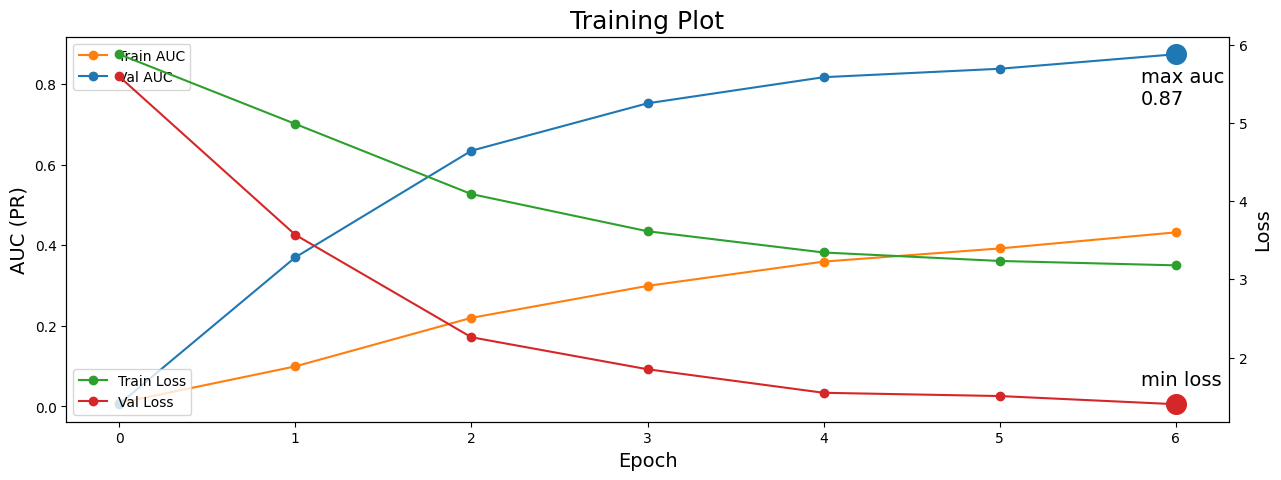

In [7]:
#mode_of_training='finetuning'
#load_model_path = '/kaggle/input/birdclef-vgg16-rcnn-pretrained/birdclef_VGG16_RCNN_pretrained.h5'
#myModel.vgg_main(CFG,utility_obj,mode_of_training,load_model_path,test_sample_size,debug=debug, epochs = 7)

# Inference
Set debug=True if you want to test on just 64(CPU) and 512(TPU) test samples instead of 3,416 The input variable test_sample_size is depricated and does not work anymore. The model's test accuracy varies between 77% and 87% based on how the fold is created.

Change the load_model_path to the path where the fine-tuned model is saved

In [5]:
mode_of_training='inference'
load_model_path = '/kaggle/input/vgg-rcnn-finetuned/birdclef_enet_vit_finetuned.h5'
myModel.vgg_main(CFG,utility_obj,mode_of_training,load_model_path,test_sample_size)
df_misclassification=pd.read_csv('Missed_Predictions.csv')
df_misclassification

> Running on TPU-VM  | Num of TPUs:  8
#########################
#### Testing
#### Image Size: (128, 384) | Model: VGG16_RCNN
#### Num Test: 512
# Loading finetuned model
# Testing the model
Saved all test predictions to Test_Predictions.csv
Saved all misclassified predictions to Missed_Predictions.csv
Test Accuracy : 78.90625


,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,...,yefcan,yelbis1,yenspu1,yertin1,yesbar1,yespet1,yetgre1,yewgre1,pred_name,target_name
0,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,...,0.000160,0.001240,0.000324,0.001170,0.000497,0.000144,0.001922,0.004810,reccuc1,abethr1
1,abethr1,[],['song'],NaN,NaN,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,4.0,...,0.000460,0.011529,0.001527,0.011029,0.011266,0.000472,0.001248,0.004111,trobou1,abethr1
2,abhori1,['laudov1'],"['adult', 'call', 'sex uncertain']",-26.6482,26.5206,Oriolus larvatus,African Black-headed Oriole,Tony Archer,Creative Commons Attribution-NonCommercial-Sha...,1.5,...,0.000444,0.000429,0.000227,0.004056,0.000804,0.000676,0.000337,0.000260,hoopoe,abhori1
3,abythr1,[],['call'],7.0810,38.6390,Turdus abyssinicus,Abyssinian Thrush,Andrew Spencer,Creative Commons Attribution-NonCommercial-Sha...,5.0,...,0.000469,0.000796,0.000752,0.001542,0.000786,0.000432,0.002471,0.023376,cibwar1,abythr1
4,abythr1,['bswdov1'],['call'],7.0769,38.6401,Turdus abyssinicus,Abyssinian Thrush,Guido O. Keijl,Creative Commons Attribution-NonCommercial-Sha...,3.5,...,0.002857,0.024201,0.000621,0.007594,0.029307,0.001256,0.000573,0.017588,tamdov1,abythr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,blhher1,[],['alarm call'],-0.5814,36.4757,Ardea melanocephala,Black-headed Heron,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,...,0.000052,0.000070,0.000057,0.000853,0.000158,0.000051,0.001755,0.000227,egygoo,blhher1
104,blnwea1,[],['call'],-0.5700,30.7600,Ploceus nigricollis,Black-necked Weaver,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,3.0,...,0.000218,0.000067,0.000051,0.001227,0.000935,0.000006,0.002985,0.007398,joygre1,blnwea1
105,bltori1,[],['song'],-1.0173,36.6781,Oriolus percivali,Black-tailed Oriole,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.0,...,0.000020,0.000528,0.000123,0.009314,0.015951,0.000060,0.000152,0.001570,afrgrp1,bltori1
106,bltori1,[],['song'],-0.3510,35.3190,Oriolus percivali,Black-tailed Oriole,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,...,0.000231,0.000638,0.000290,0.013184,0.007795,0.000047,0.000841,0.002339,gytbar1,bltori1
